# Pre-processing

In [31]:
import pandas as pd
import numpy as np

df = pd.read_csv("./data/employee_survey_merge.csv")
df.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,occupation,EmpType,WLB,WorkEnv,...,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction,work_schedule_variability,work_schedule_variability_logit,pause_work,pause_work_logit,work_pace,work_pace_pca
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,Bachelor,True,33.5,5,0.276,-0.964392,0.944,2.824757,1.447515,-0.577181
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,Bachelor,False,36.0,5,0.279,-0.949429,0.977,3.748949,1.246218,-0.740119
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,Bachelor,True,10.5,5,0.236,-1.174737,0.995,5.293105,7.932585,4.483327
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,Bachelor,True,23.0,5,0.276,-0.964392,0.944,2.824757,1.447515,-0.577181
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,...,Bachelor,False,20.5,5,0.605,0.426340,0.458,-0.168399,0.674643,-0.587966


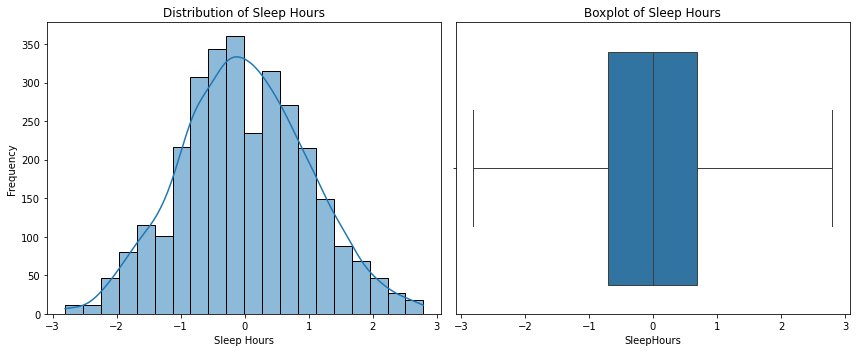

Mean: -3.1475281517968074e-16
Median: -0.006080867787417012
Std: 1.0001653302483
Skewness: 0.07964224920578218
Kurtosis: -0.17692459175362174


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

plt.figure(figsize=(12, 5))

# 直方图 + KDE
plt.subplot(1, 2, 1)
sns.histplot(data["SleepHours"], bins=20, kde=True)
plt.title("Distribution of Sleep Hours")
plt.xlabel("Sleep Hours")
plt.ylabel("Frequency")

# 箱线图
plt.subplot(1, 2, 2)
sns.boxplot(x=data["SleepHours"])
plt.title("Boxplot of Sleep Hours")

plt.tight_layout()
plt.show()

# 输出统计量
print("Mean:", data["SleepHours"].mean())
print("Median:", data["SleepHours"].median())
print("Std:", data["SleepHours"].std())
print("Skewness:", skew(data["SleepHours"]))
print("Kurtosis:", kurtosis(data["SleepHours"]))


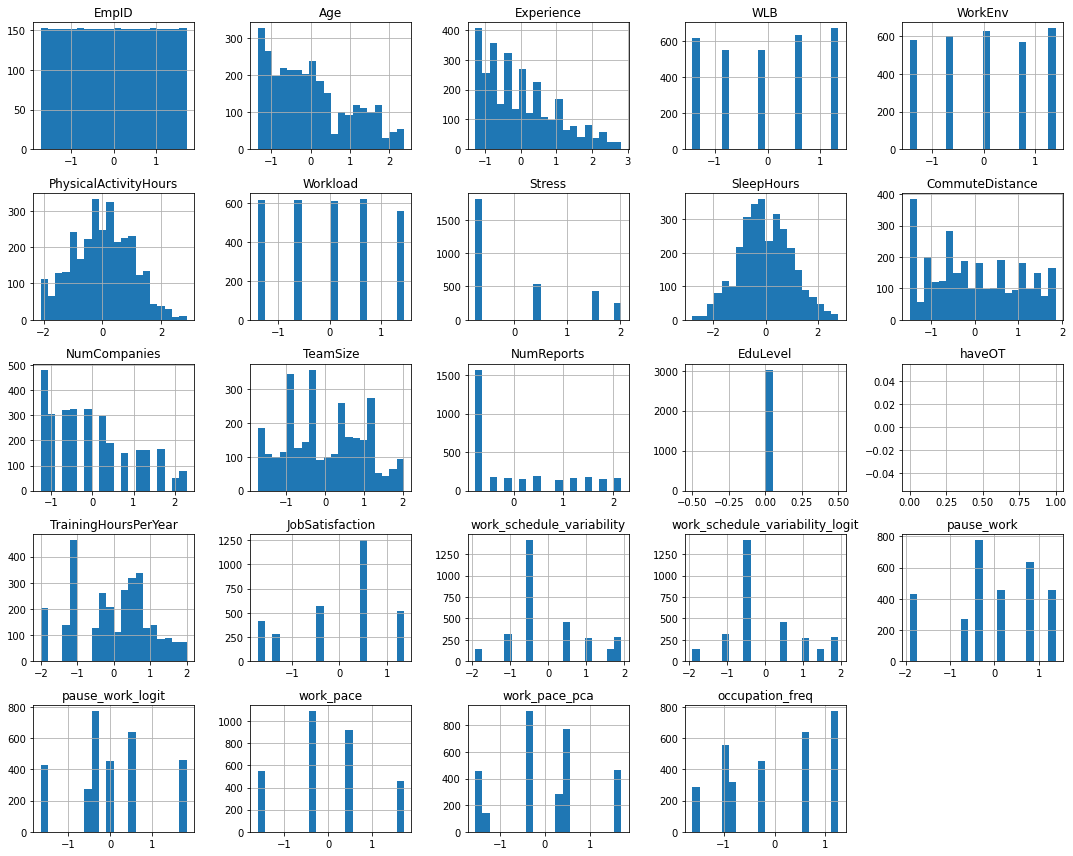

In [10]:
import matplotlib.pyplot as plt

num_cols = data.select_dtypes(include=np.number).columns

data[num_cols].hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()


## Correlation

In [23]:
num_cols = df.select_dtypes(include=np.number).columns
corr = df[num_cols].corr()

sleep_corr = corr["SleepHours"].sort_values(ascending=False)
print(sleep_corr)


SleepHours                         1.000000
JobSatisfaction                    0.179872
CommuteDistance                    0.036101
EmpID                              0.031663
Workload                           0.015909
Stress                             0.011891
work_pace_pca                      0.011835
work_pace                          0.009464
work_schedule_variability_logit    0.003537
NumReports                         0.002455
pause_work                        -0.002787
work_schedule_variability         -0.003037
WLB                               -0.005495
TeamSize                          -0.007951
TrainingHoursPerYear              -0.008410
pause_work_logit                  -0.009537
PhysicalActivityHours             -0.009900
Age                               -0.017378
NumCompanies                      -0.017540
WorkEnv                           -0.019231
Experience                        -0.019495
Name: SleepHours, dtype: float64


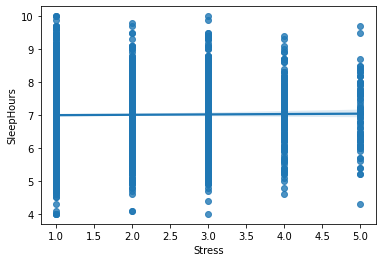

In [19]:
#stress and sleep hours
sns.regplot(x="Stress", y="SleepHours", data=df)
plt.show()


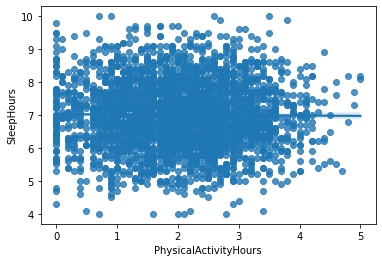

In [20]:
df["Physical_sq"] = df["PhysicalActivityHours"]**2

sns.regplot(x="PhysicalActivityHours",
            y="SleepHours",
            data=df)
plt.show()


In [3]:
data = df.copy()

data["haveOT"] = data["haveOT"].map({"TRUE": 1, "FALSE": 0})

edu_order = ["High School", "Bachelor", "Master", "PhD"]
data["EduLevel"] = pd.Categorical(data["EduLevel"],
                                  categories=edu_order,
                                  ordered=True)
data["EduLevel"] = data["EduLevel"].cat.codes

In [14]:
job_order = ["Intern/Fresher","Junior","Mid","Senior","Lead"]
df["JobLevel"] = pd.Categorical(df["JobLevel"],
                                categories=job_order,
                                ordered=True).codes

In [5]:
num_cols = data.select_dtypes(include=np.number).columns

cat_cols = data.select_dtypes(include="object").columns

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    data[col] = np.where(data[col] < lower, lower, data[col])
    data[col] = np.where(data[col] > upper, upper, data[col])


In [7]:
#category
# Low-cardinality variable
low_card_cols = ["Gender", "MaritalStatus", "EmpType", "CommuteMode"]

# One-hot encoding
data = pd.get_dummies(data, columns=low_card_cols, drop_first=True)

# occupation - Frequency coding
if "occupation" in data.columns:
    freq = data["occupation"].value_counts() / len(data)
    data["occupation_freq"] = data["occupation"].map(freq)
    data = data.drop(columns=["occupation"])


In [8]:
#Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = data.select_dtypes(include=np.number).columns

data[num_cols] = scaler.fit_transform(data[num_cols])


/Users/zhuxinyi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/zhuxinyi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/zhuxinyi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [24]:
#Multicollinearity
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns=["SleepHours"]).copy()
X = pd.get_dummies(X, drop_first=True)

bool_cols = X.select_dtypes(include=["bool"]).columns
X[bool_cols] = X[bool_cols].astype(int)

X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna(axis=0)

zero_var_cols = X.columns[X.nunique() <= 1]
X = X.drop(columns=zero_var_cols)

X = sm.add_constant(X)

vif_df = pd.DataFrame({
    "Variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
}).sort_values("VIF", ascending=False)

print(vif_df)



/Users/zhuxinyi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/zhuxinyi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                           Variable         VIF
18                       pause_work         inf
16        work_schedule_variability         inf
34                 occupation_Legal         inf
33                    occupation_IT         inf
32                    occupation_HR         inf
31               occupation_Finance         inf
30                  JobLevel_Senior         inf
29                     JobLevel_Mid         inf
28                    JobLevel_Lead         inf
27                  JobLevel_Junior         inf
37                 occupation_Sales         inf
21                    work_pace_pca         inf
20                        work_pace         inf
19                 pause_work_logit         inf
36            occupation_Operations         inf
17  work_schedule_variability_logit         inf
35             occupation_Marketing         inf
3                        Experience         inf
14             TrainingHoursPerYear         inf
2                               Age  162

In [32]:
df_clean = df.copy()

df_clean = df_clean.drop(columns=["EmpID"])

df_clean = df_clean.drop(columns=[
    "work_schedule_variability_logit",
    "pause_work_logit",
    "work_pace_pca"
])


df_clean["CareerStage"] = df["Experience"] / (df["Age"] + 1)
df_clean = df_clean.drop(columns=["Age","Experience"])

df_clean = pd.get_dummies(df_clean, drop_first=True)

print("Final shape:", df_clean.shape)


Final shape: (3025, 42)


In [33]:
df_clean.head()

,WLB,WorkEnv,PhysicalActivityHours,Workload,Stress,SleepHours,CommuteDistance,NumCompanies,TeamSize,NumReports,...,occupation_Sales,EmpType_Full-Time,EmpType_Part-Time,CommuteMode_Car,CommuteMode_Motorbike,CommuteMode_Public Transport,CommuteMode_Walk,EduLevel_High School,EduLevel_Master,EduLevel_PhD
0,1,1,2.5,2,1,7.6,20,3,12,0,...,False,True,False,True,False,False,False,False,False,False
1,1,1,1.8,2,2,7.9,15,4,11,0,...,False,True,False,True,False,False,False,False,False,False
2,2,4,2.1,5,4,6.5,17,0,30,0,...,False,True,False,False,True,False,False,False,False,False
3,2,2,1.9,3,1,7.5,13,2,9,0,...,False,False,False,False,False,True,False,False,False,False
4,3,1,3.7,2,1,4.9,20,0,7,0,...,True,False,True,True,False,False,False,False,False,False


In [34]:
X = df_clean.drop(columns=["SleepHours"]).copy()
X = pd.get_dummies(X, drop_first=True)

bool_cols = X.select_dtypes(include=["bool"]).columns
X[bool_cols] = X[bool_cols].astype(int)

X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna(axis=0)

zero_var_cols = X.columns[X.nunique() <= 1]
X = X.drop(columns=zero_var_cols)

X = sm.add_constant(X)

vif_df = pd.DataFrame({
    "Variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
}).sort_values("VIF", ascending=False)

print(vif_df)

/Users/zhuxinyi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/zhuxinyi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                        Variable         VIF
14                    pause_work         inf
13     work_schedule_variability         inf
26            occupation_Finance         inf
29              occupation_Legal         inf
30          occupation_Marketing         inf
31         occupation_Operations         inf
32              occupation_Sales         inf
15                     work_pace         inf
28                 occupation_IT         inf
27                 occupation_HR         inf
25               JobLevel_Senior  575.383643
11          TrainingHoursPerYear  560.732727
23                 JobLevel_Lead  516.863573
24                  JobLevel_Mid  208.373535
22               JobLevel_Junior   51.906797
16                   CareerStage   30.429229
7                   NumCompanies    6.713068
8                       TeamSize    6.654158
20          MaritalStatus_Single    5.917207
19         MaritalStatus_Married    4.681824
35               CommuteMode_Car    3.004760
9         

# Feature Engineering

In [46]:
corr = df_clean.corr()["SleepHours"].sort_values()
print(corr)


MaritalStatus_Married          -0.040189
occupation_Operations          -0.037196
occupation_HR                  -0.027900
CareerStage                    -0.021419
EduLevel_Master                -0.020073
WorkEnv                        -0.019231
NumCompanies                   -0.017540
JobLevel_Senior                -0.014208
JobLevel_Mid                   -0.013637
PhysicalActivityHours          -0.009900
Gender_Other                   -0.008442
TrainingHoursPerYear           -0.008410
TeamSize                       -0.007951
CommuteMode_Public Transport   -0.007915
occupation_Legal               -0.007525
occupation_Sales               -0.006568
WLB                            -0.005495
occupation_Finance             -0.003406
work_schedule_variability      -0.003037
pause_work                     -0.002787
CommuteMode_Walk               -0.001526
NumReports                      0.002455
EmpType_Part-Time               0.003529
occupation_Marketing            0.006479
MaritalStatus_Wi

In [47]:
# Comprehensive variable of stress
# When the noise of a single variable is large, the comprehensive index is more stable.
df_clean["stress_index"] = (
    df_clean["Stress"] +
    df_clean["Workload"] +
    df_clean["haveOT"]
) / 3


In [48]:
print(df_clean[["SleepHours","Stress","Workload","haveOT","stress_index"]].corr())
# |corr(Sleep, StressIndex)| > 单独 Stress,说明综合变量更稳定。

              SleepHours    Stress  Workload    haveOT  stress_index
SleepHours      1.000000  0.011891  0.015909  0.015908      0.023038
Stress          0.011891  1.000000  0.009620  0.010491      0.589524
Workload        0.015909  0.009620  1.000000  0.017481      0.773165
haveOT          0.015908  0.010491  0.017481  1.000000      0.271187
stress_index    0.023038  0.589524  0.773165  0.271187      1.000000


In [49]:
df_clean["RecoveryIndex"] = (
    df_clean["PhysicalActivityHours"] +
    df_clean["WLB"] +
    df_clean["JobSatisfaction"]
) / 3


In [50]:
#Senior managers may affect sleep
df_clean["ManagementLoad"] = (
    df_clean["TeamSize"] +
    df_clean["NumReports"]
)


In [51]:
#Nonlinear term
df_clean["Stress_sq"] = df_clean["Stress"] ** 2
df_clean["PhysicalActivity_sq"] = df_clean["PhysicalActivityHours"] ** 2


In [52]:
#interaction
df_clean["Stress_Workload"] = df_clean["Stress"] * df["Workload"]
df_clean["WLB_Stress"] = df_clean["WLB"] * df_clean["Stress"]


In [41]:
base_X = sm.add_constant(df[["Stress","Workload"]])
extended_X = sm.add_constant(df[["Stress","Workload","Stress_Workload"]])

model_base = sm.OLS(df["SleepHours"], base_X).fit()
model_ext = sm.OLS(df["SleepHours"], extended_X).fit()

print(model_base.rsquared_adj)
print(model_ext.rsquared_adj)
#交互项不仅没帮助，还增加了复杂度惩罚，需要drop df["Stress_Workload"]，这个特征工程（Stress_Workload）没有带来信息增益。

-0.00027066134811648546
-0.0003173531627014281


In [44]:
base_X = sm.add_constant(df[["WLB","Stress"]])
extended_X = sm.add_constant(df[["WLB","Stress","WLB_Stress"]])

model_base = sm.OLS(df["SleepHours"], base_X).fit()
model_ext = sm.OLS(df["SleepHours"], extended_X).fit()

print(model_base.rsquared_adj)
print(model_ext.rsquared_adj)
#交互项不仅没帮助，还增加了复杂度惩罚，需要drop df["WLB_Stress"]

-0.0004896482174585604
-0.0004410152741416429


In [53]:
corr = df_clean.corr()["SleepHours"].sort_values()
print(corr)


MaritalStatus_Married          -0.040189
occupation_Operations          -0.037196
occupation_HR                  -0.027900
CareerStage                    -0.021419
EduLevel_Master                -0.020073
WorkEnv                        -0.019231
NumCompanies                   -0.017540
JobLevel_Senior                -0.014208
JobLevel_Mid                   -0.013637
PhysicalActivityHours          -0.009900
Gender_Other                   -0.008442
TrainingHoursPerYear           -0.008410
TeamSize                       -0.007951
CommuteMode_Public Transport   -0.007915
occupation_Legal               -0.007525
PhysicalActivity_sq            -0.007378
occupation_Sales               -0.006568
WLB                            -0.005495
ManagementLoad                 -0.005196
occupation_Finance             -0.003406
work_schedule_variability      -0.003037
pause_work                     -0.002787
CommuteMode_Walk               -0.001526
WLB_Stress                     -0.001064
NumReports      